# Data Visualization

Making informative visualizations (or plots) is one of the most important tasks in data analysis. It is often the case that we need to communicate our findings from data analysis to a wider audience. It may be a part of EDA (Exploratory Data Analysis), for example, to help identify outliers or needed data transformations. It may also be to communicate results to a non-technical audience. For others, building an interactive visualization for the web may be the end goal.

## Matplotlib API Primer

`matplotlib` is a multi-platform data visualization library built on NumPy arrays and designed to work with the broader Pandas stack. It provides an object-oriented API for plotting graphs and charts.

Over time, matplotlib has spawned a number of add-on toolkits for data visualization that use matplotlib for their underlying plotting. One of these is `seaborn`, which we explore later in this chapter.

First, we import the usual libraries together with matplotlib.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.arange(10)

data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The default plot is a line plot:

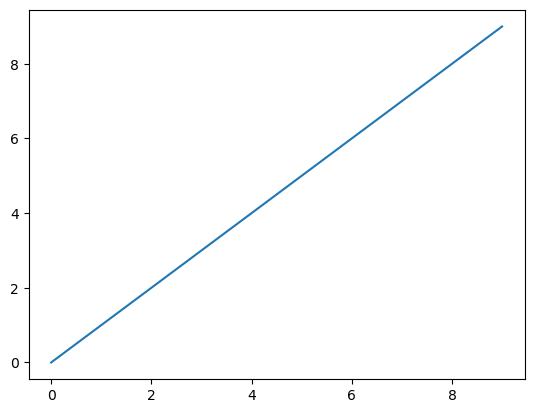

In [4]:
plt.plot(data)

In [5]:
data = pd.Series(np.arange(5), index=np.arange(2,12,2))

data

2     0
4     1
6     2
8     3
10    4
dtype: int64

If the object is a Series, x-axis is the index, y-axis is the value:

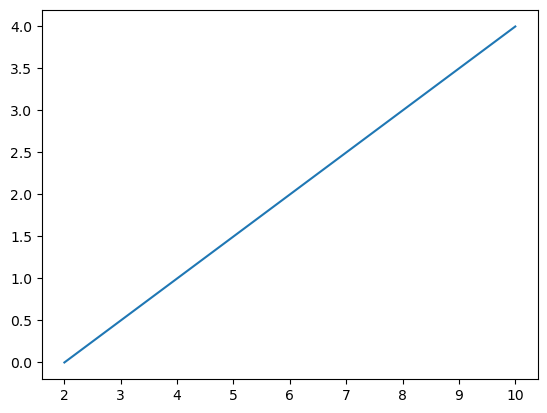

In [6]:
plt.plot(data)

### Figures and Subplots

Plots happen inside a `Figure` object. You can create a new figure with `plt.figure`:

In [7]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

A blank figure is not enough for plotting. You also need to create one or more subplots (called `axes`) in the figure using `add_subplot()`.

In [8]:
ax = fig.add_subplot()

Let's plot the above line again:

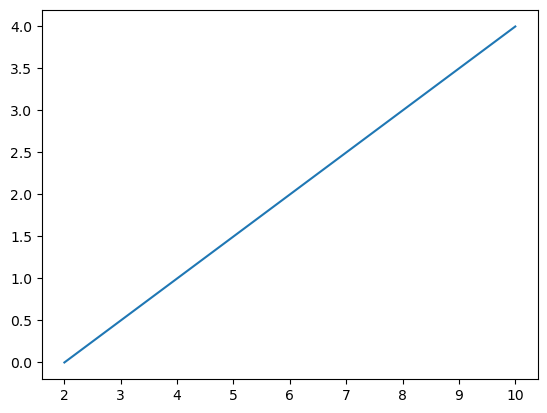

In [9]:
ax.plot(data)
# in jupyter notebook, the code above will show the plot
# however, in vscode jupyter extension, we will need to add the code below
fig

If you want to add more than 1 plot in a figure, you can pass arguments to `add_subplot`. 

For example, `add_subplot(2, 2, 1)` will create a 2x2 grid of plots and place the plot in the first quadrant.

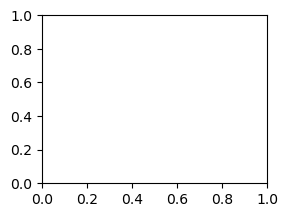

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)

If you create the next two subplots, you’ll end up with a visualization that looks like an empty figure with three subplots:

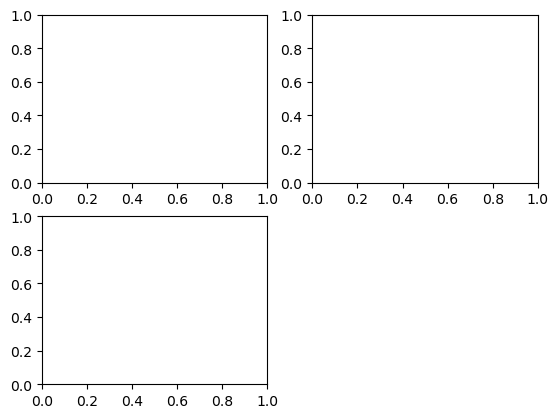

In [11]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
fig

Let's add a line plot as the third plot, and make the color `black` and linestyle `dashed`:

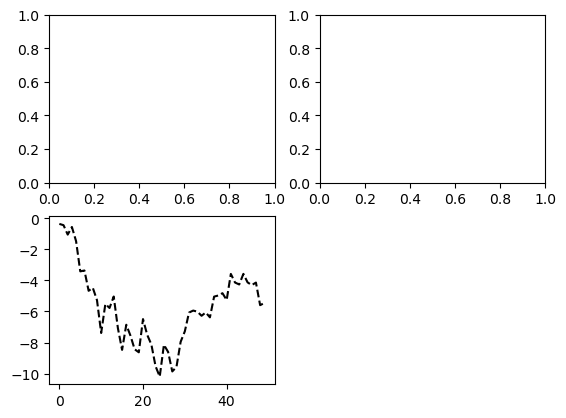

In [12]:
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")
fig

Next, we will plot a histogram with `20 bins` and `0.3` (30%) transparency. We will also add a scatter plot as the 2nd plot.

We will explain histogram and scatter plot in the next section.

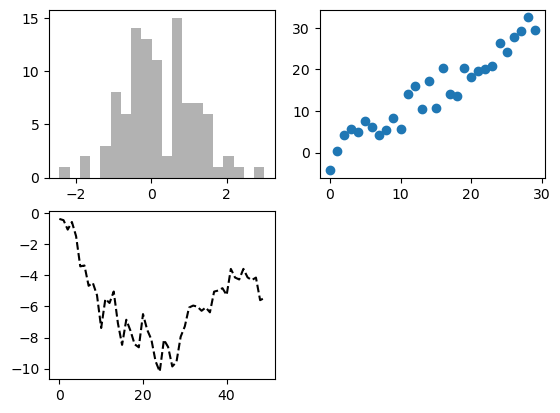

In [13]:
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
fig

For convenience, matplotlib includes a `plt.subplots` method that creates a new figure and returns a NumPy array containing the created subplot `axes`.

The arguments are the number of rows and columns. If you do not specify the number of rows and columns, the default is one subplot `axes`. 

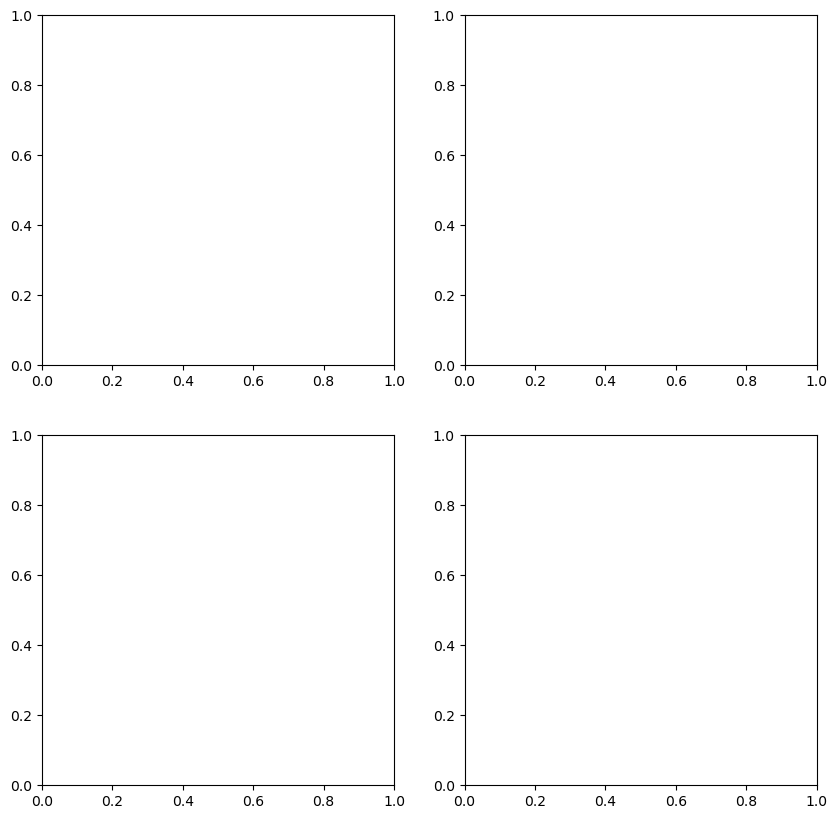

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

In [15]:
# an array of 4 axes
axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

You can pass arguments `sharex` and `sharey` to allow the subplots to share x- and y- axis respectively. 

You can call the `subplots_adjust` method with `wspace` and `hspace` parameters to control the percent of the figure width and height to use for spacing between subplots.

Finally, the `axes` is a 2D array of Axes objects which you can index to plot individually.

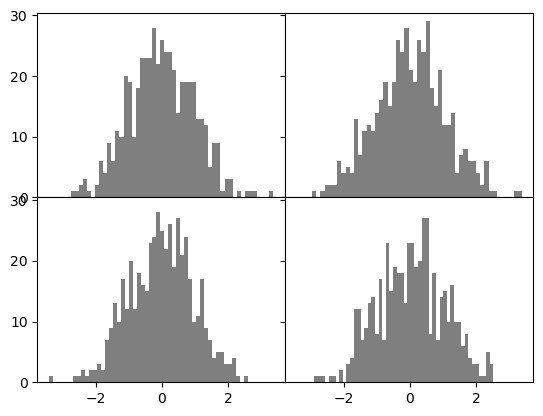

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50,
                        color="black", alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0)

> Create 3x2 subplots which share the x- and y-axis and 0 spacing as above but with line plots instead. Use `np.random.standard_normal(50).cumsum()` for the data.

### Colors, Markers, Line Styles and Legends

`plot` function accepts optional styling arguments. For example, we can change the `color` of the line to green, the `linestyle` to dashed, and the `marker` (to mark actual data points) to circles.

- `color` accepts a string, shorthand or hex code. For example, `color='green'` or `color='g'` or `color='#008000'`.
- `linestyle` accepts a string or shorthand notation. For example, `linestyle='dashed'` or `linestyle='--'`.
- `marker` accepts a shorthand notation. For example, `marker='o'`.

For a full list of styling arguments, refer to the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

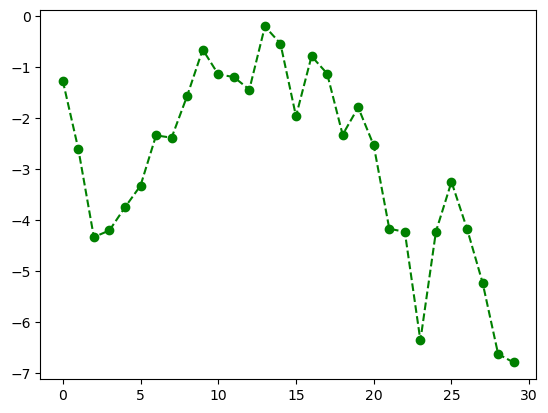

In [17]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="green", linestyle="dashed", marker="o");

You can also provide a format string as follows:

```python
fmt = '[marker][line][color]'
```

Each of them is optional. If not provided, the value from the style cycle is used. Exception: If `line` is given, but no `marker`, the data will be a line without markers.

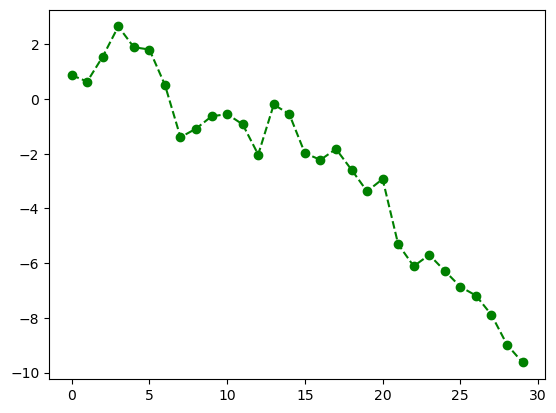

In [18]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), "o--g");

You can plot multiple plots in the same subplot by calling `plot` multiple times. You can also change the style from interpolation to steps.

Let's also widen the figure size to make it easier to read.

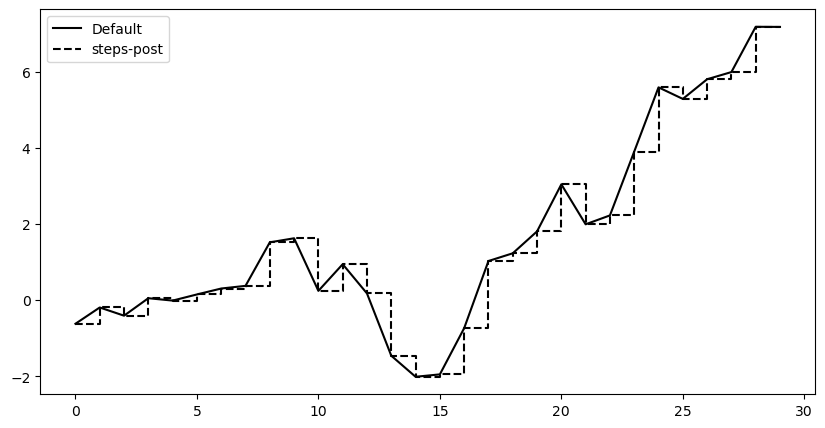

In [19]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()

data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", label="Default")
ax.plot(data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post")
ax.legend()

Since we passed the `label` arguments to `plot`, we are able to create a plot legend to identify each line using `ax.legend`.

> Plot `data` with _magenta_ color, _star_ marker and _dash-dot_ line style. 

### Ticks, Labels and Limits

You can control the plot range, tick locations and tick labels using `xlim` (`ylim`), `xticks` (`yticks`) and `xticklabels` (`yticklabels`) respectively.

They can be used in two ways:

- Called with no arguments returns the current parameter value, e.g. `ax.xlim()` returns the current x-axis plotting range (equivalent to `get_xlim()`)
- Called with parameters sets the parameter value, e.g. `ax.xlim(0, 10)` sets the x-axis plotting range to 0 to 10 (equivalent to `set_xlim(0, 10)`)



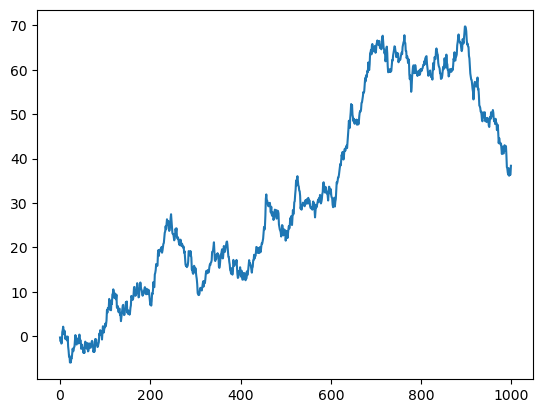

In [20]:
fig, ax = plt.subplots()
# set the random seed to ensure reproducibility
rng = np.random.default_rng(seed=111)
ax.plot(rng.standard_normal(1000).cumsum())

To change the x-axis ticks, it’s easiest to use `set_xticks` and `set_xticklabels`. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using set_xticklabels:

In [21]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

`rotation` option sets the x tick labels at a 30-deg rotation.

Lastly, `set_xlabel` gives a name to the x-axis, and `set_title` sets the subplot title.

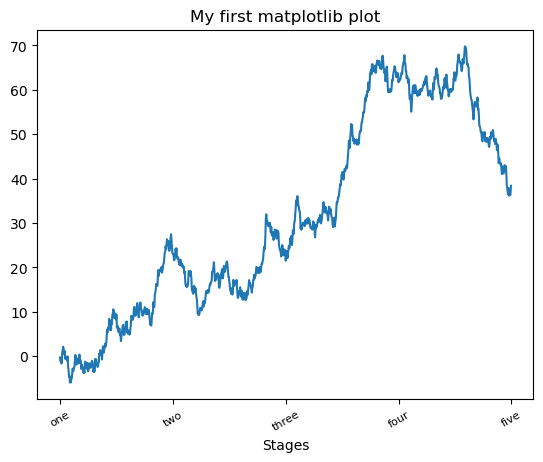

In [22]:
ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")
fig

> Set y ticks to `0, 15, 30, 45, 60, 75`, y tick labels to `first, second, third, fourth, fifth, sixth`, y label to `Phases` and fontsize to `8`.

### Pandas `plot` Method

Pandas objects also have a way to plot charts for us to quickly visualize the data. There's a `plot` method for Pandas `Series` and `DataFrame`. Instead of calling `plt.plot()` or `ax.plot()` directly, you'll call `.plot()` on Series or DataFrame. It uses Matplotlib under the hood.

Let's use the closing S&P 500 index prices as example.

In [23]:
data = pd.read_csv("../data/spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

Like pyplot, the default is a line plot.

<Axes: xlabel='Date'>

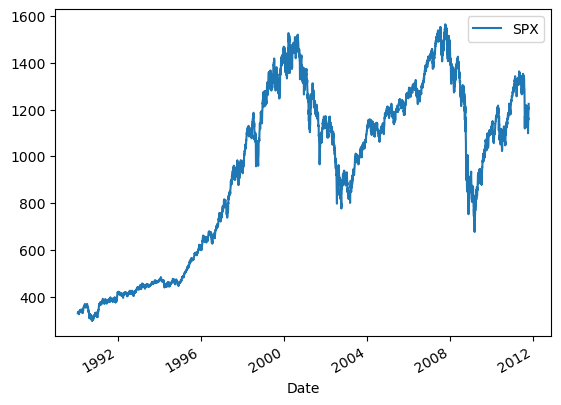

In [24]:
data.plot()

<Axes: xlabel='Date'>

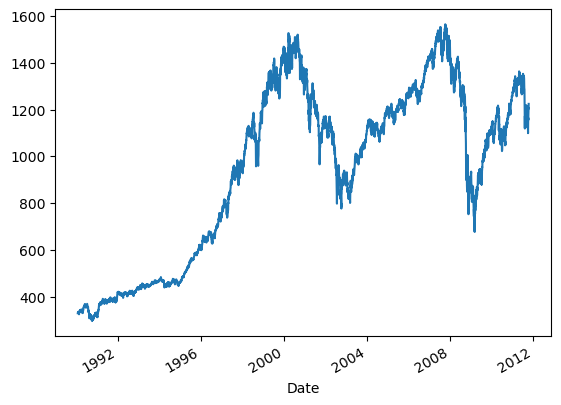

In [25]:
# or calling plot on series
spx.plot()

Note the difference between the DataFrame and Series plots:
- For the DataFrame, the index is plotted on the _x-axis_, and each column is plotted as a _separate line_ (we only have one column so we only see one line). There is also a legend provided as each column name is used as a label.
- For the Series, the index is plotted on the _x-axis_, and the values are plotted on the _y-axis_.

The x-axis ticks and limits can be adjusted with the `xticks` and `xlim` options, and the y-axis respectively with `yticks` and `ylim`.

The plot method has a number of different plot types we can use. We can use the `kind` keyword argument or `.plot` accessor method to specify the type of plot we want. 

You can refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) for more information.

<Axes: title={'center': 'S&P 500 Daily Returns'}, ylabel='Frequency'>

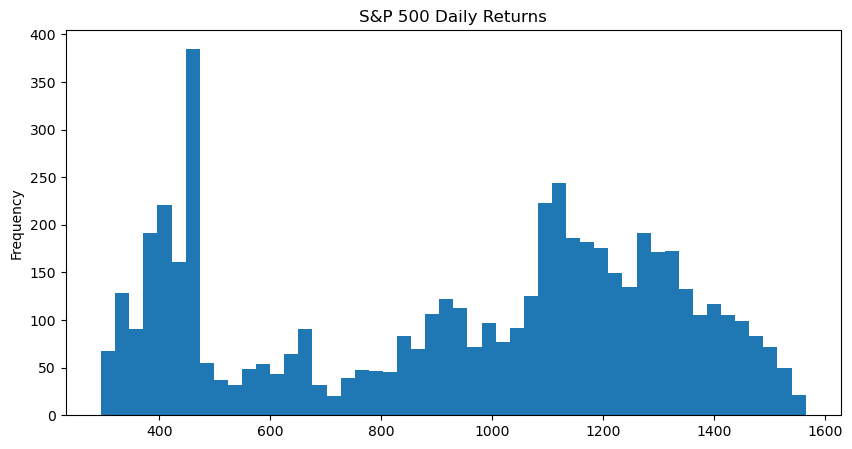

In [26]:
spx.plot(kind='hist', bins=50, title='S&P 500 Daily Returns', figsize=(10, 5))

<Axes: title={'center': 'S&P 500 Daily Returns'}, ylabel='Frequency'>

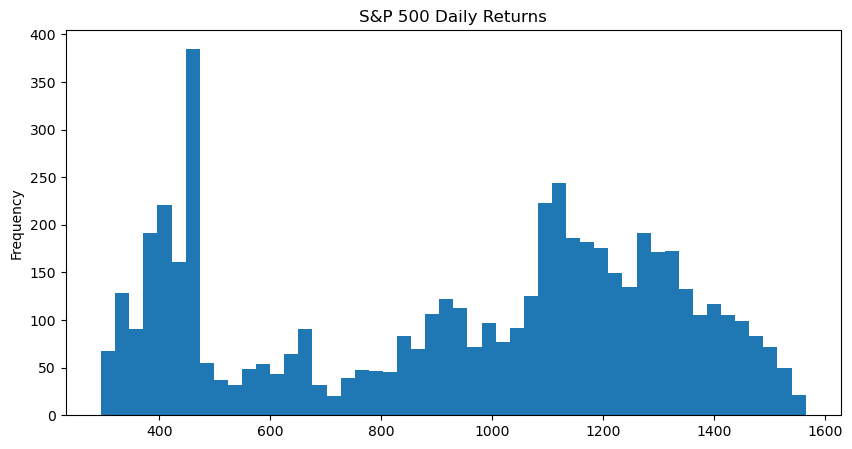

In [27]:
spx.plot.hist(bins=50, title='S&P 500 Daily Returns', figsize=(10, 5))

If you have an existing `axes`, you can also pass it to the `.plot()` method:

<Axes: xlabel='Date'>

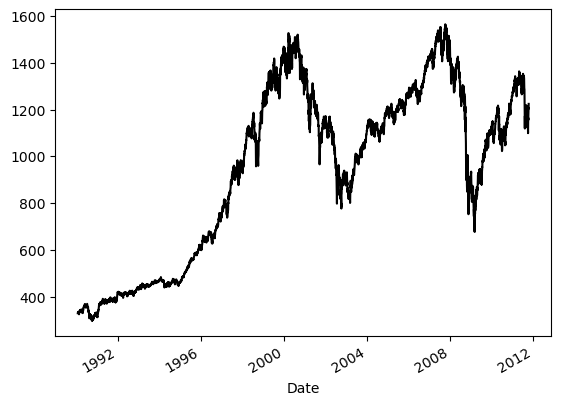

In [28]:
fig, ax = plt.subplots()

spx.plot(ax=ax, color='black')

### Annotations and Drawing on a Subplot

You can also draw annotations on your plot, such as arrows, shapes, and text.

Let's add text and arrow annotation to mark some of the important dates from the 08-09 financial crisis. We will also zoom in on 2007-2010.

Note the `asof` method to get the latest value of the stock price on a particular date.

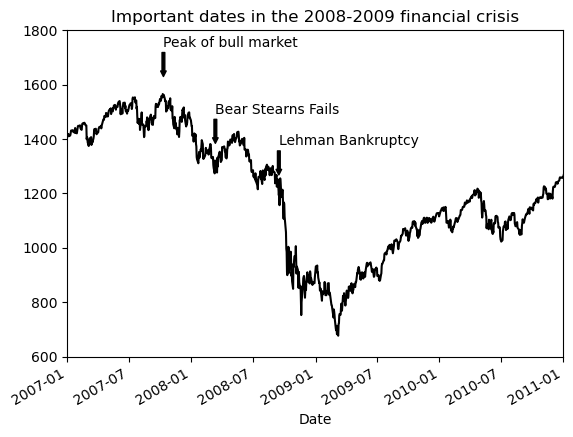

In [29]:
from datetime import datetime

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment="top")
    
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")
fig

### Saving Plots to File

You can save the active figure to file using `savefig` method. The file format is inferred from the extension of the filename, e.g. for an SVG file:

In [30]:
fig.savefig('../assets/spx_plot.svg')

You can also control the dots-per-inch resolution by setting the dpi argument. Most commonly, this is set to 72, but you can set it to higher for publishing purpose to get higher resolution image:

In [31]:
fig.savefig('../assets/spx_plot.png', dpi=400)

### Configuration

matplotlib comes with default configuration and color schemes that are geared towards publication. However, you can customize the behavior via global parameters governing figure size, subplot spacing, colors, font sizes, grid styles, and so on.

For example, to set the global default figure size to be 10×10:

In [32]:
plt.rc("figure", figsize=(10, 10))

All of the current configuration settings are found in the `plt.rcParams` dictionary, and they can be restored to their default values by calling the `plt.rcdefaults()` function.

The first argument to `rc` is the component you wish to customize, such as `"figure", "axes", "xtick", "ytick", "grid", "legend"`, or many others. After that it follows a sequence of keyword arguments indicating the new parameters.

In [33]:
plt.rc("font", family="monospace", weight="bold", size=8)

For more information on configuration, see the [matplotlib documentation](https://matplotlib.org/stable/tutorials/introductory/customizing.html).

## Seaborn

`matplotlib` can be fairly low-level, and often we find ourselves repeating the same code to make our plots look better. `seaborn` is a library that builds on top of `matplotlib` to provide a higher-level interface for statistical graphics. It is also tightly integrated with `pandas` data structures.

First, let's import the library:

In [34]:
import seaborn as sns

### Bar Plots

We will plot bar plots using pandas `plot` method then compare it with seaborn `barplot` method.

<Axes: >

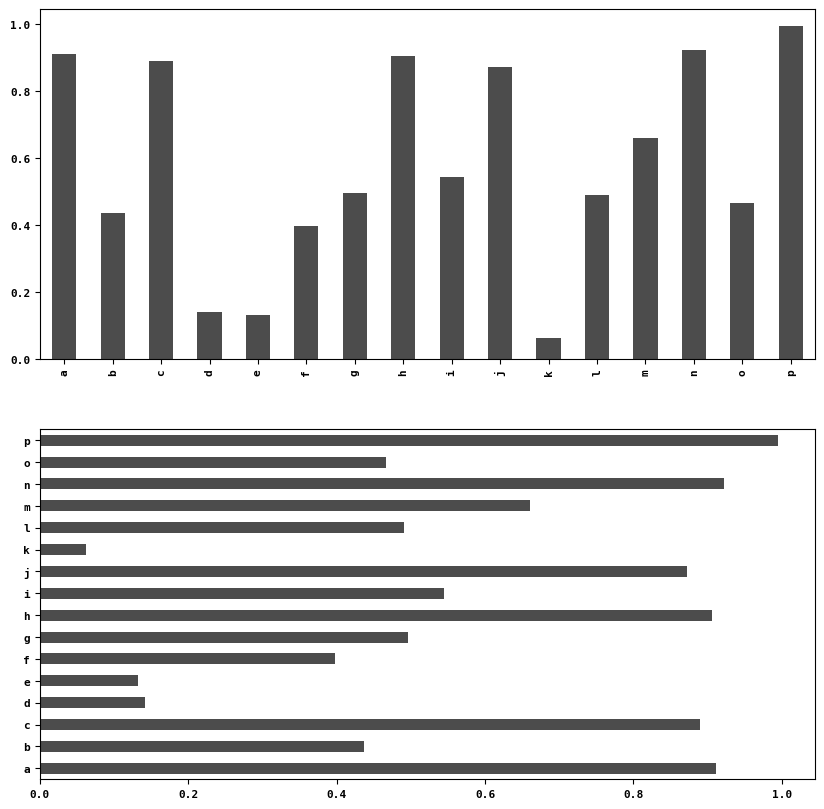

In [35]:
fig, axes = plt.subplots(2, 1)

data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

With a DataFrame, bar plots group the values in each row in bars, side by side, for each value:

In [36]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)), 
                  index=["one", "two", "three", "four", "five", "six"],
                  columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

df

Genus,A,B,C,D
one,0.131924,0.061157,0.336779,0.030352
two,0.347947,0.062179,0.258701,0.794403
three,0.298190,0.300975,0.644994,0.404100
four,0.450148,0.035392,0.059612,0.077630
five,0.321362,0.457262,0.910286,0.854421
six,0.633008,0.228330,0.013182,0.380845


<Axes: >

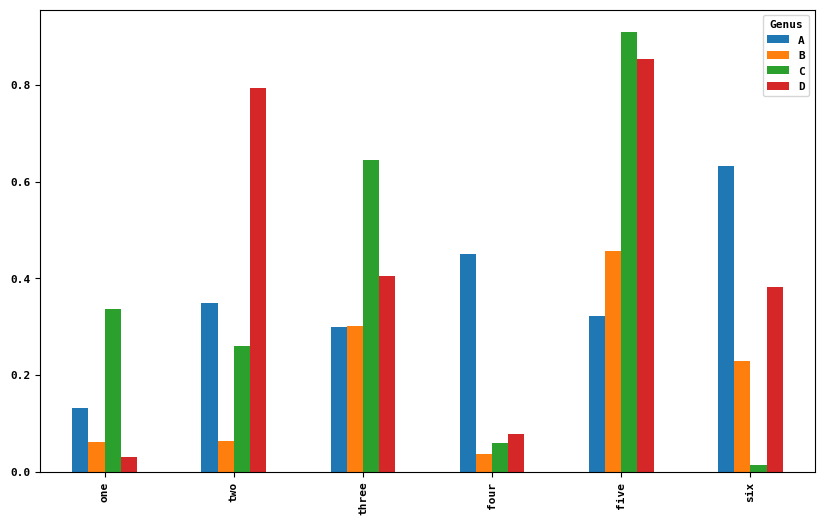

In [37]:
df.plot.bar(figsize=(10, 6))

We can create stacked bar plots from a DataFrame by passing stacked=True, resulting in the value in each row being stacked together:

<Axes: >

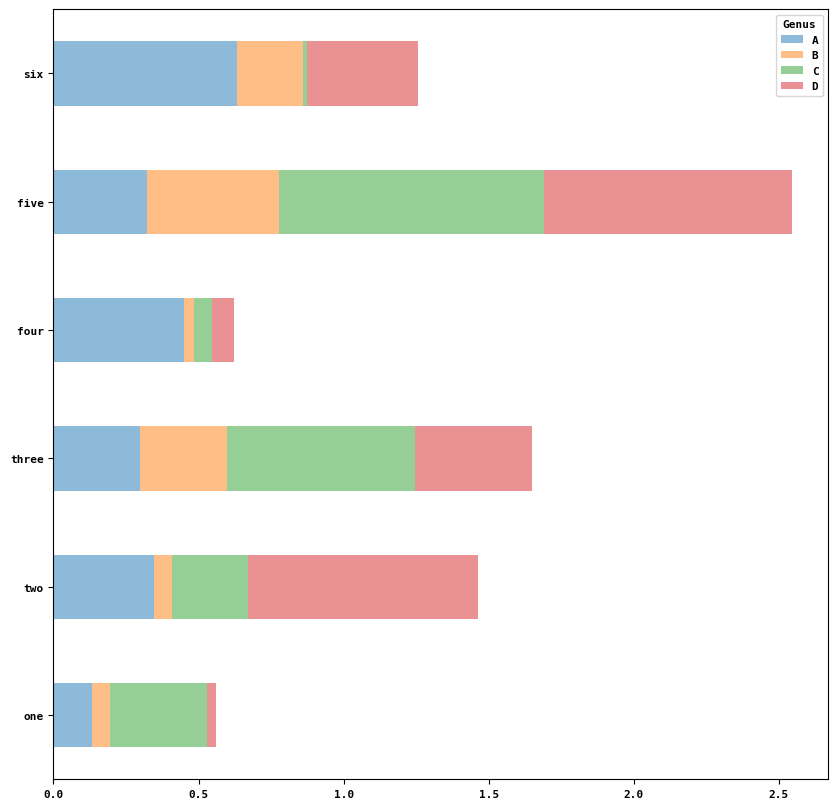

In [38]:
df.plot.barh(stacked=True, alpha=0.5)

Let's use the tipping dataset as example. We want to make a stacked bar plot showing the percentage of data points for each party size for each day.

In [39]:
tips = pd.read_csv("../data/tips.csv")

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [40]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])

party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [41]:
# remove one and six due to lack of data
party_counts = party_counts.loc[:, 2:5]

Let's try to normalize (divide) each column (size) by the sum of the column, so that the sum of the column is 1.0.

This allows us to compare the relative proportions of each column.

In [42]:
# normalize to sum to 1

party_pcts = party_counts.div(party_counts.sum(axis="columns"), 
                              axis="index")

party_pcts


size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


This is also known as a normalized stacked bar chart. You can see that party sizes appear to increase on the weekend.

<Axes: xlabel='day'>

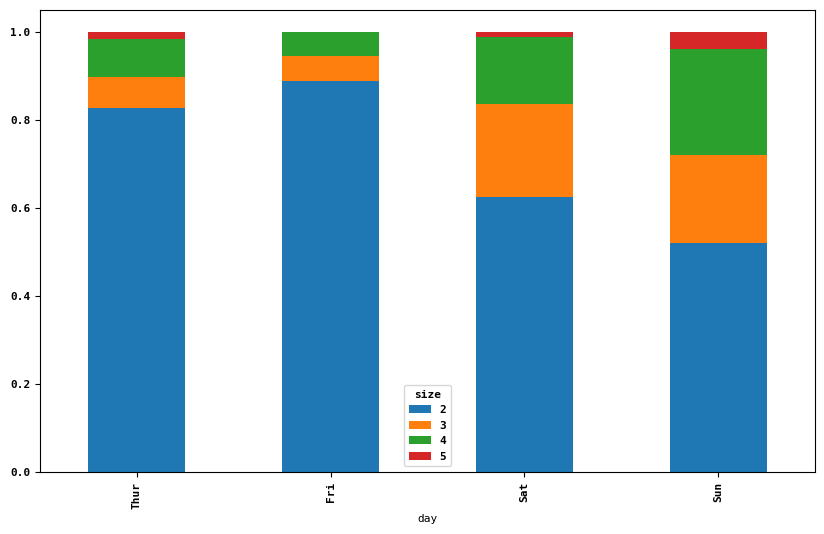

In [43]:
party_pcts.plot.bar(stacked=True, figsize=(10, 6))

Using seaborn can make things much simpler with data that requires aggregation or summarization before making a plot. 

Let's look now at the tipping percentage by day:

In [44]:
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])

tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

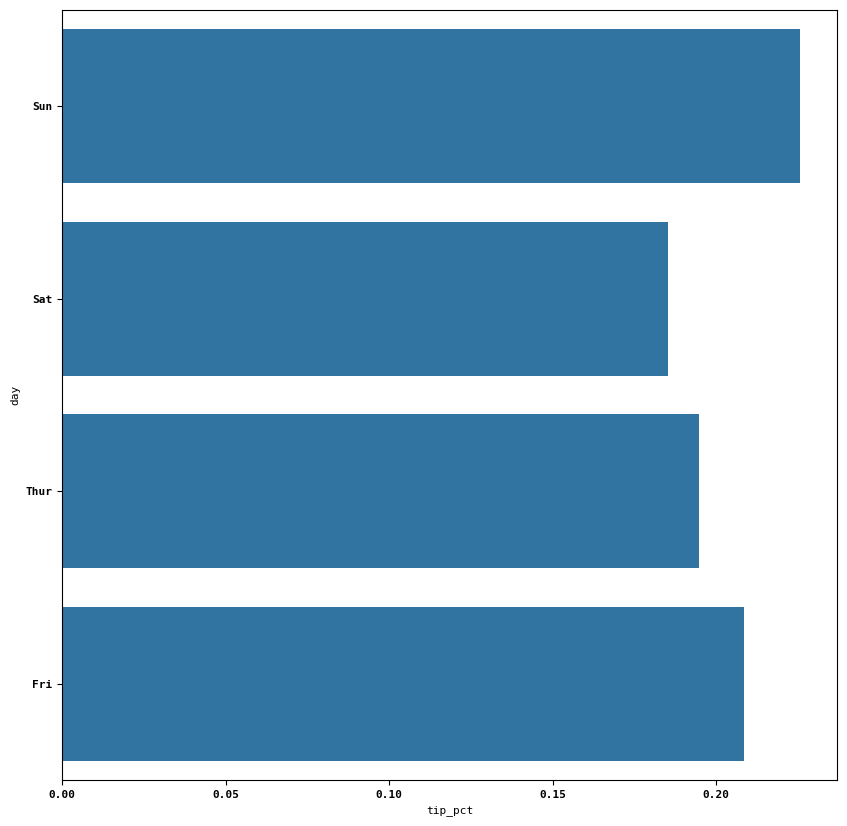

In [47]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h", errorbar=None)

Because there are multiple observations for each value in the day, the bars are the average value of `tip_pct`. The black lines drawn on the bars represent the 95% confidence interval.

The `hue` option enables us to split by an additional categorical value.

<Axes: xlabel='tip_pct', ylabel='day'>

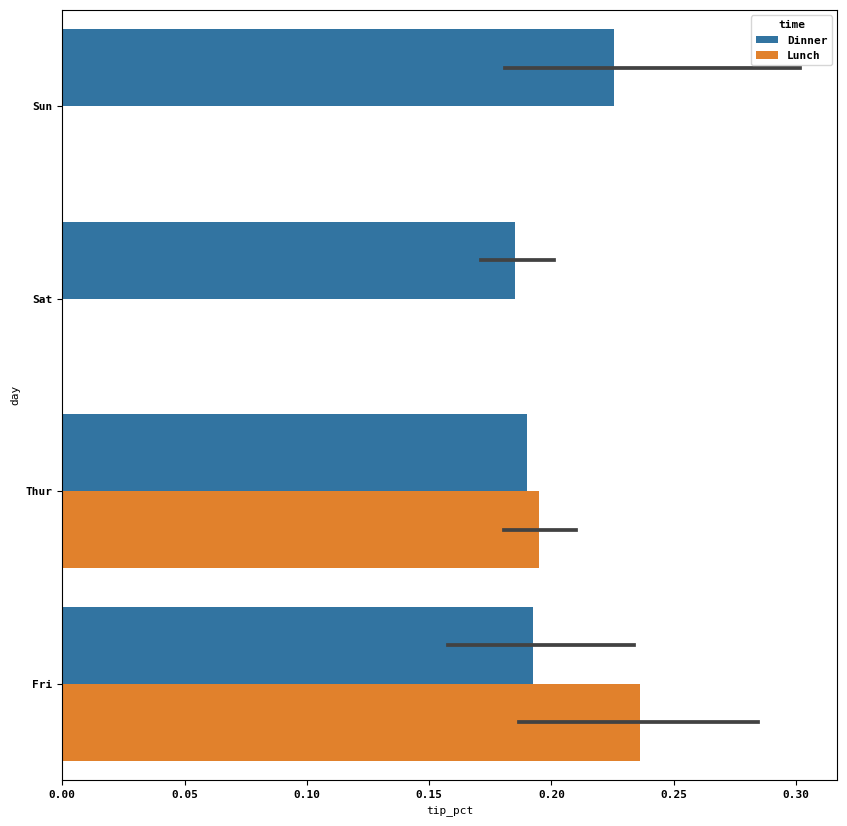

In [70]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

Notice that seaborn automatically changes the aesthetics of the plot to make it more visually appealing. You can switch between different plot appearances using `set_style()`.

Refer to the [seaborn documentation](https://seaborn.pydata.org/tutorial/aesthetics.html) for more information.

In [71]:
sns.set_style("whitegrid")

> Plot a vertical bar plot of `time` in the x-axis and `total_bill` in the y-axis using `sns.barplot()`.

### Histograms and Density Plots

**Histograms** and **density plots** are ways of visualizing the distribution of a data sample. They plot the data along a number line and show the frequency of observations at each point. The **height of the bar** (histogram) or the **area of the curve** (density plot) indicates the number of observations that lie _within that interval_. Histograms and density plots are very similar, but the former uses bars and the latter uses a smooth curve to represent the distribution.

Histogram has a `bins` parameter that controls the number of bins. The default value is 10. The number of bins should be chosen based on the number of observations in the data. If there are too few bins, the histogram will not show the details in the distribution. If there are too many bins, the individual bars will be too small to see clearly. The number of bins should be large enough to show the shape of the distribution clearly, but not so large as to create too many small bars.

<Axes: ylabel='Frequency'>

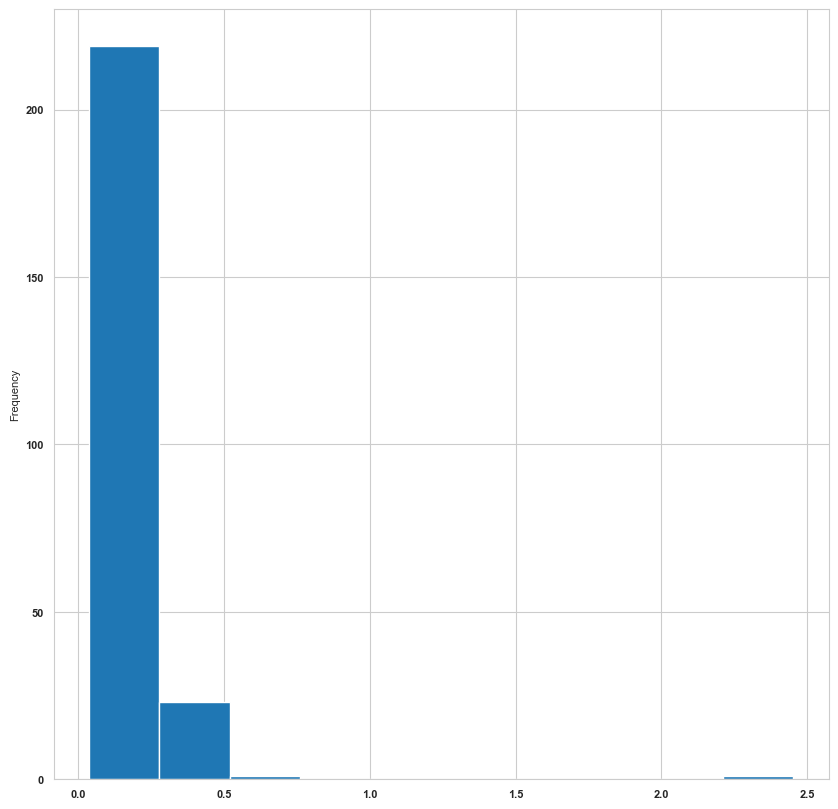

In [76]:
# the default bins is 10
tips["tip_pct"].plot.hist()

Let's filter away the extreme values in the data set. A good practice is to use the `quantile` method to find the `0.01` and `0.99` quantiles (or 0.05 and 0.95 quantiles), and then filter the data set to only include values between those two quantiles.

_A quantile is a value that divides a data set into subgroups. The `0.5` quantile is the same as the median. The `0.25` quantile is the value where 25% of the data set is less than that value. The `0.75` quantile is the value where 75% of the data set is less than that value._

<Axes: ylabel='Frequency'>

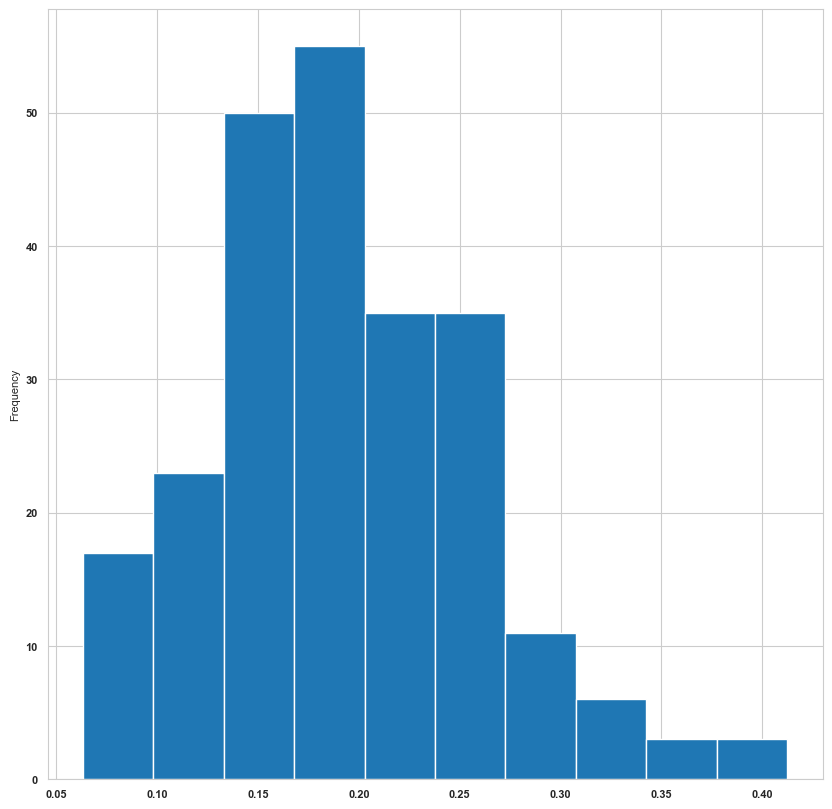

In [79]:

quantile_01 = tips["tip_pct"].quantile(0.01)
quantile_99 = tips["tip_pct"].quantile(0.99)
tips_pct_filter = (tips["tip_pct"] > quantile_01) & (tips["tip_pct"] < quantile_99)
tips.loc[tips_pct_filter, "tip_pct"].plot.hist()

<Axes: ylabel='Frequency'>

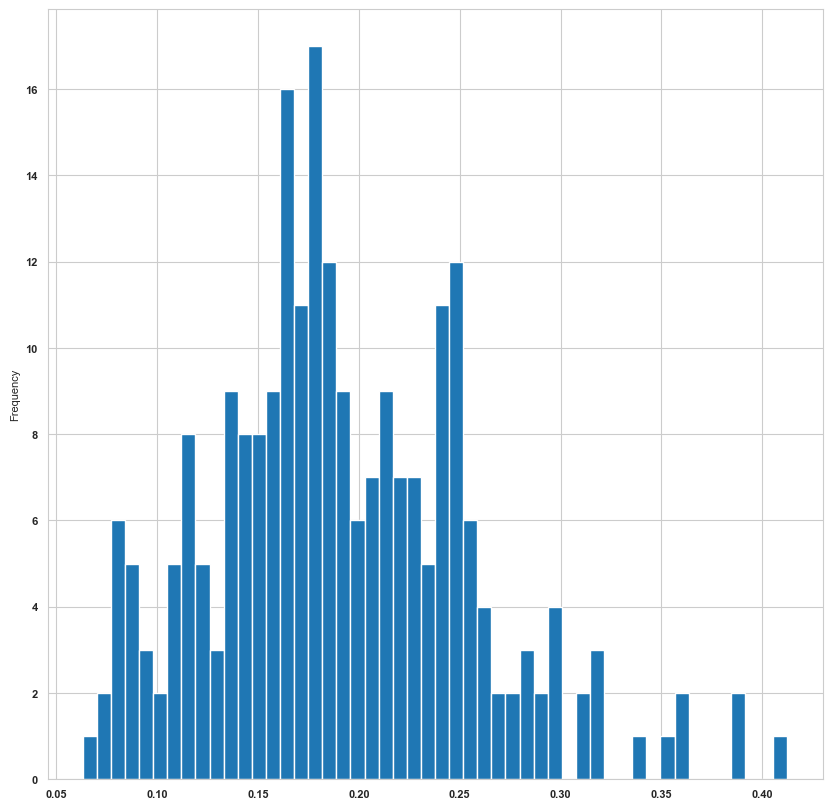

In [82]:
# let's use a more granular bins
tips.loc[tips_pct_filter, "tip_pct"].plot.hist(bins=50)

Density plot is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate the distribution as a "mixture of kernels"- that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Density plots are a commonly used tool for visualizing the distribution of a dataset.

<Axes: ylabel='Density'>

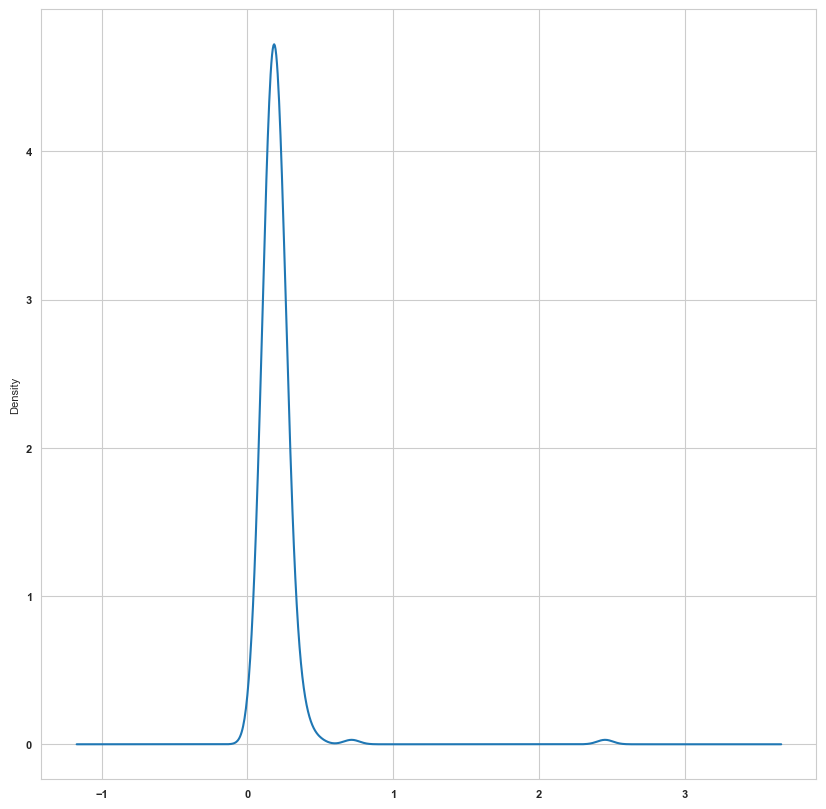

In [83]:
tips["tip_pct"].plot.density()

seaborn makes histograms and density plots even easier through its histplot method, which can plot both a histogram and a continuous density estimate simultaneously. As an example, consider a bimodal distribution consisting of draws from two different standard normal distributions:

<Axes: ylabel='Count'>

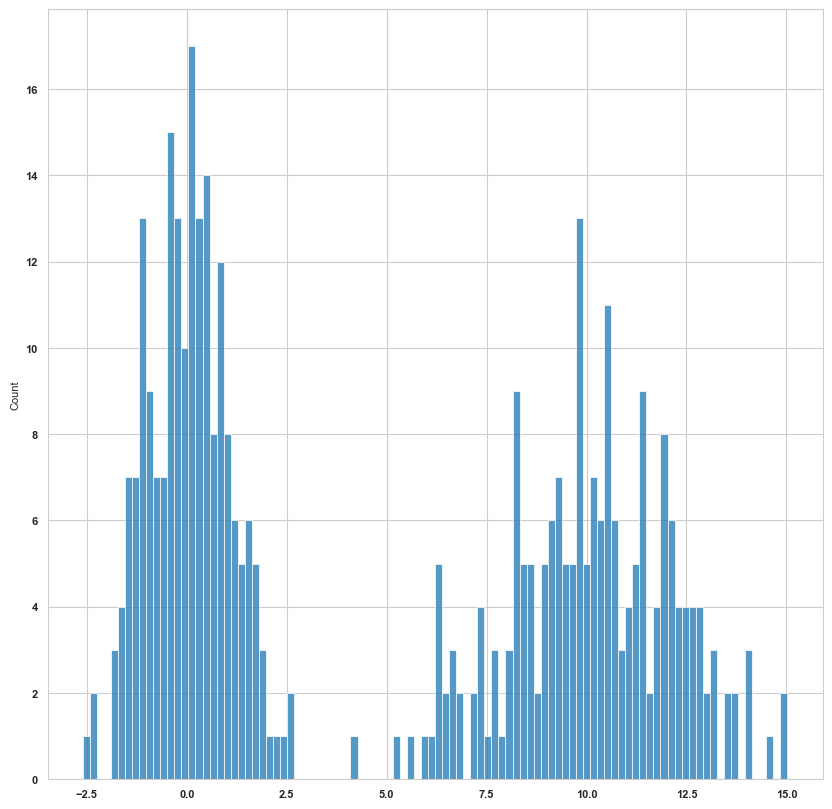

In [84]:
comp1 = np.random.standard_normal(200)
comp2  = 10 + 2 * np.random.standard_normal(200)

values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100)

Pass `kde=True` to plot the KDE on top of the histogram.

<Axes: ylabel='Count'>

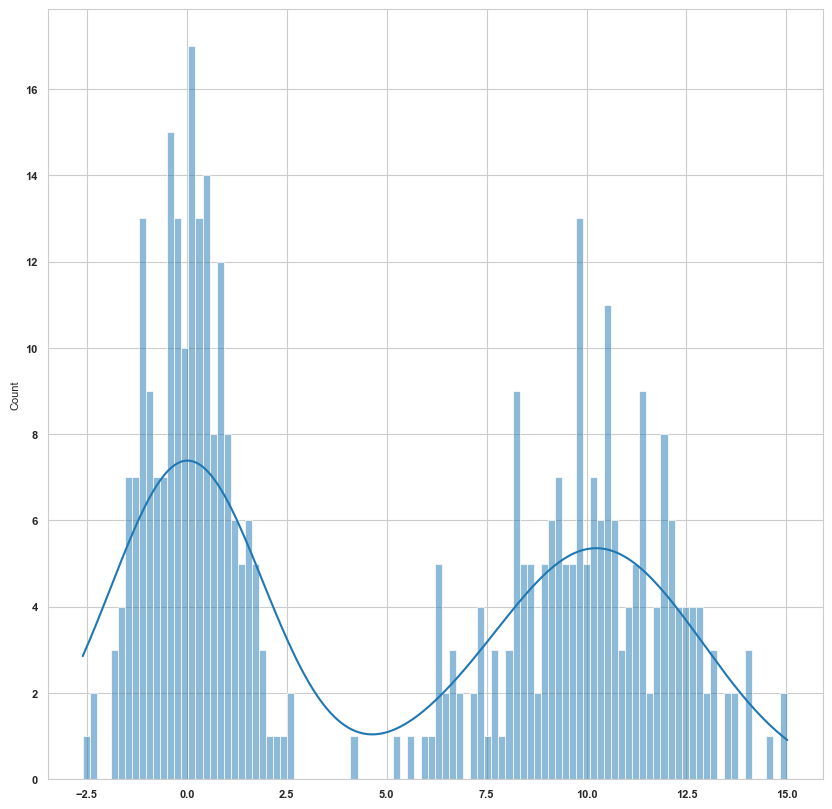

In [85]:
sns.histplot(values, bins=100, kde=True)

> Plot the histogram and KDE for `tip_pct` using seaborn

### Scatter or Point Plots

Point plots or scatter plots are used to visualize the relationship between two variables. The first variable is plotted on the x-axis and the second variable is plotted on the y-axis. The points are plotted at the intersection of the two variables. 

In [87]:
macro = pd.read_csv("../data/macrodata.csv")

data = macro[["cpi", "m1", "tbilrate", "unemp"]]

data

,cpi,m1,tbilrate,unemp
0,28.980,139.7,2.82,5.8
1,29.150,141.7,3.08,5.1
2,29.350,140.5,3.82,5.3
3,29.370,140.0,4.33,5.6
4,29.540,139.6,3.50,5.2
...,...,...,...,...
198,216.889,1474.7,1.17,6.0
199,212.174,1576.5,0.12,6.9
200,212.671,1592.8,0.22,8.1
201,214.469,1653.6,0.18,9.2


We compute log differences for the selected economic indicators and plot them.

In [88]:
trans_data = np.log(data).diff().dropna()

trans_data

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


The `regplot` method makes a scatter plot and fits a linear regression line:

Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

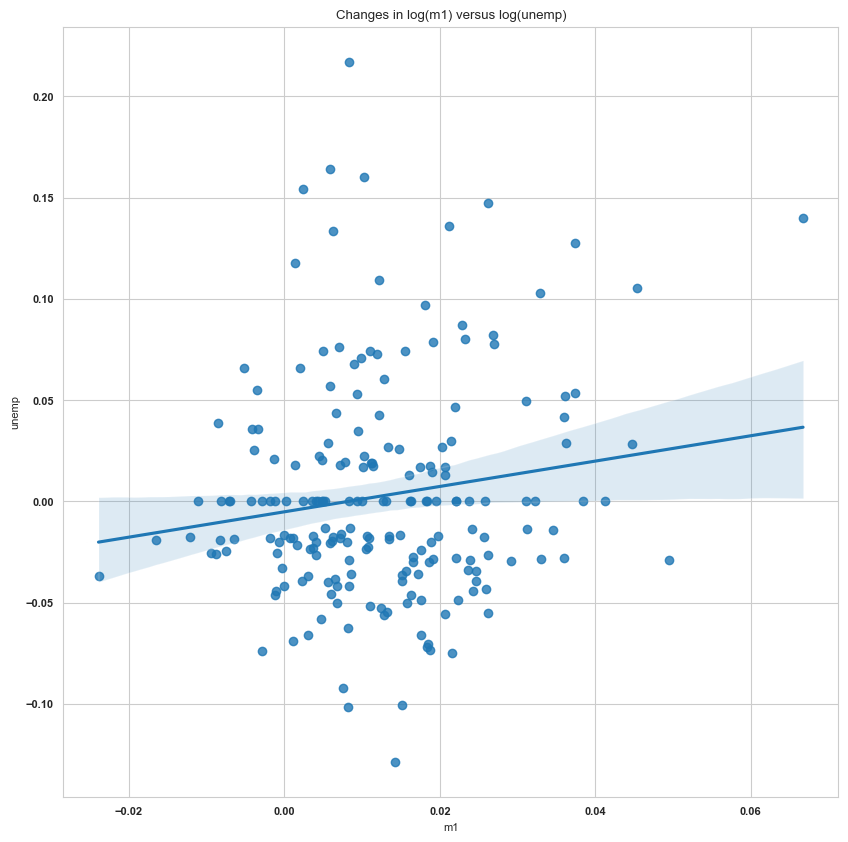

In [89]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

> Plot the scatter plot and regression line for `cpi` and `tbilrate`.

In EDA, it is helpful to visualize all the scatter plots among a group of variables. This is called a _pairs_ plot or _scatter plot_ matrix. The diagonal of the matrix shows the distribution of the variable. The scatter plots are shown in the upper and lower triangles of the matrix. The scatter plots are mirrored across the diagonal.


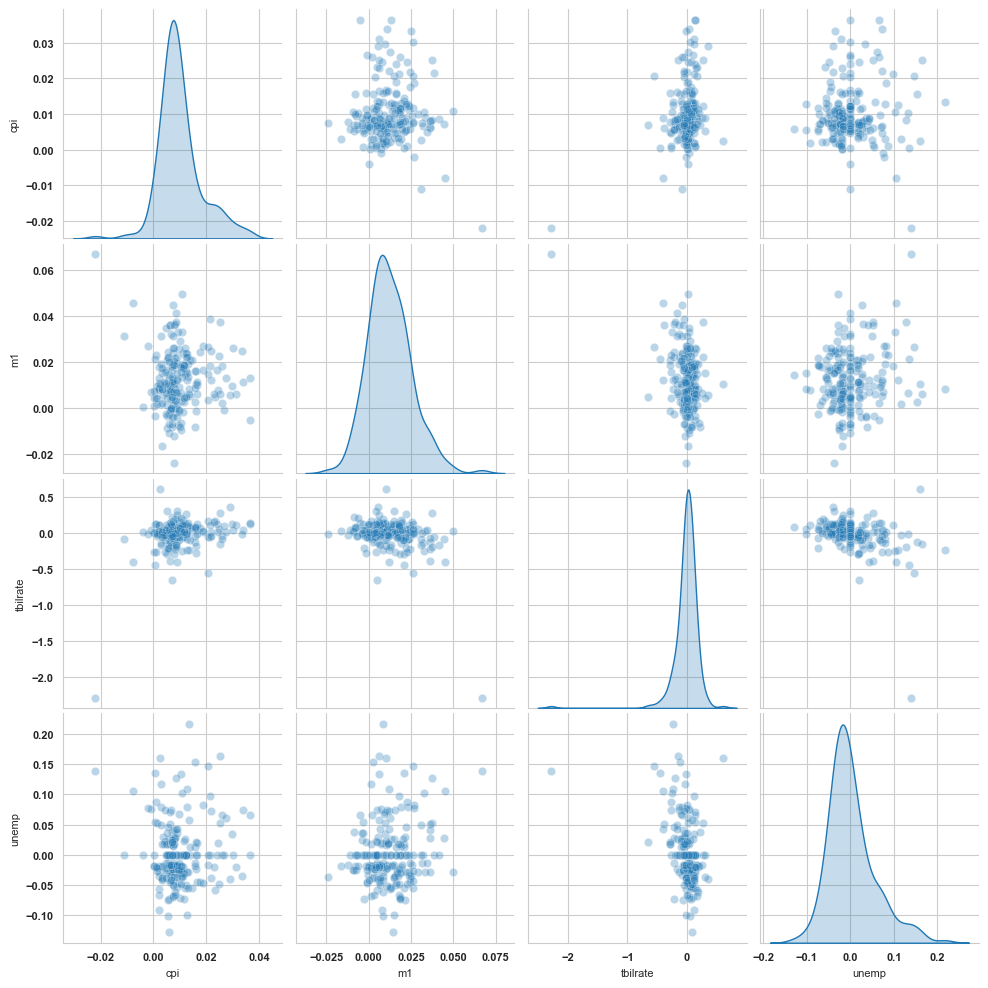

In [94]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.3})

### Facet Grids and Categorical Data

One way to visualize data with many categorical variables is to use a _facet grid_, which is a two-dimensional layout of plots where the data is split across the plots on each axis based on the distinct values of a certain variable. Seaborn has a function `catplot` that simplifies making many kinds of faceted plots split by categorical variables.

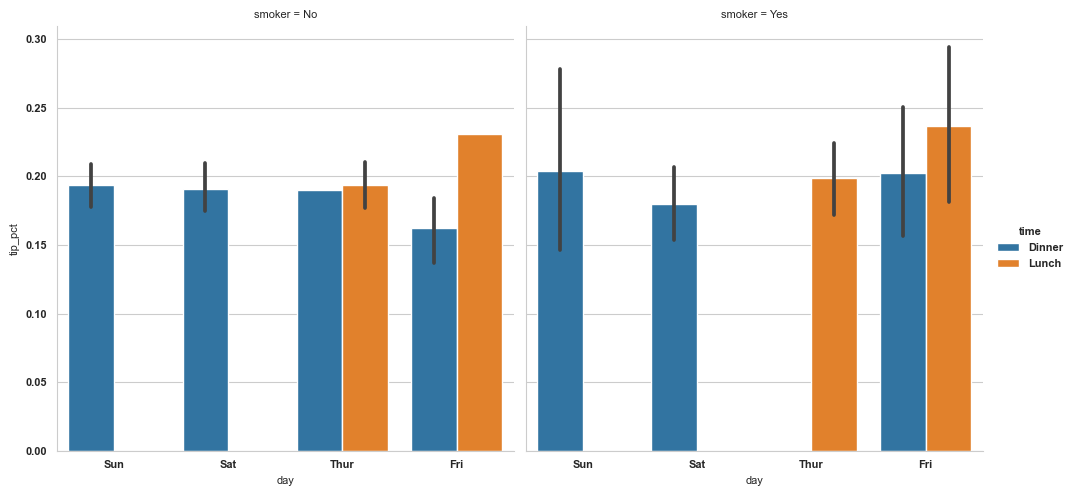

In [95]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

Instead of grouping by `"time"` by different bar colors within a facet, we can also expand the facet grid by adding one row per `time` value:

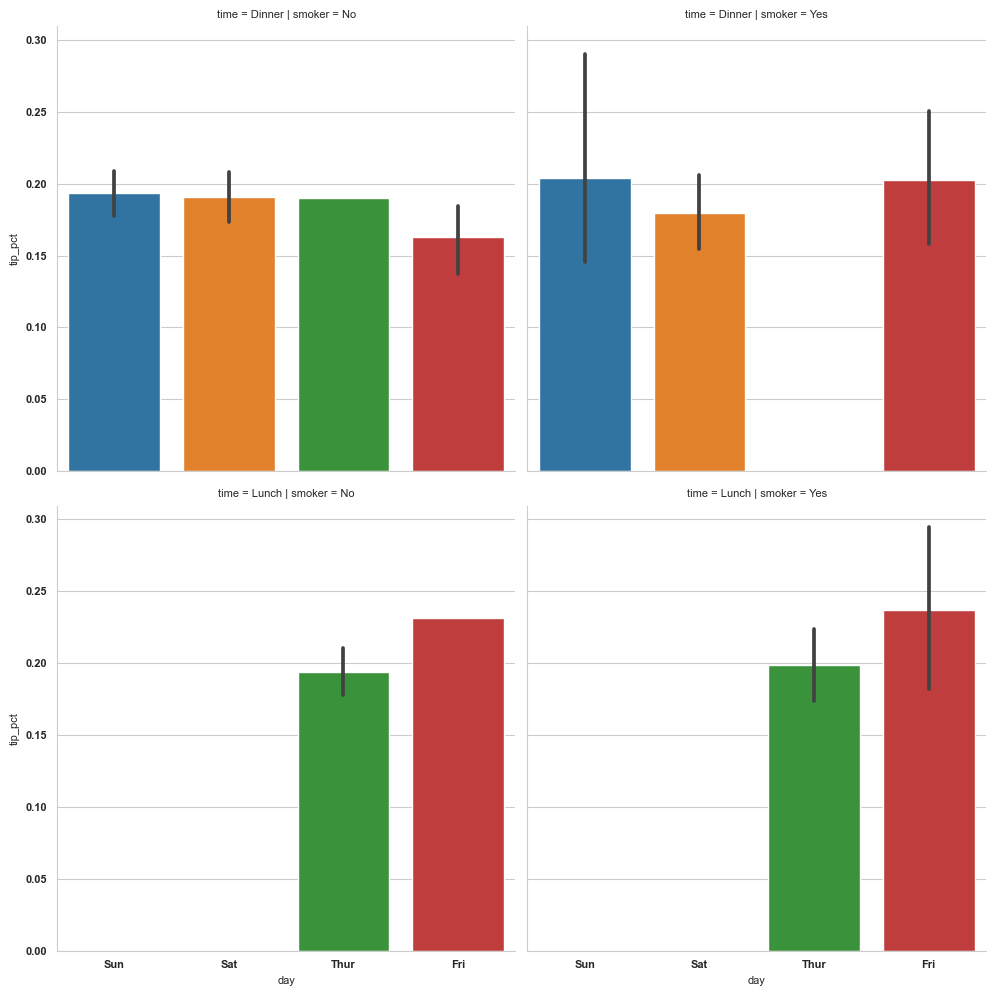

In [96]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

> Plot a catplot of `size` in x-axis, `tip_pct` in y-axis, and `time` as hue.

Box plot is a statistical graph that shows the _distribution_ of categorical data. It is also known as a box-and-whisker plot. It is a standardized way of displaying the distribution of data based on the five-number summary: _minimum_, _first quartile (Q1)_, _median (Q2)_, _third quartile (Q3)_, and _maximum_. It is often used in explanatory data analysis.

![boxplot](../assets/boxplot.png)

You can plot a _box plot_ using `catplot`.

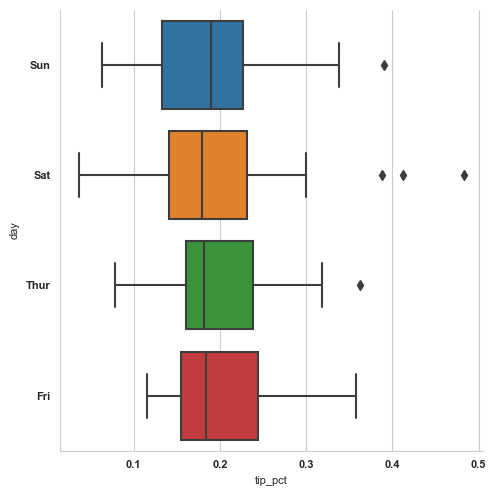

In [99]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])


> Plot a box plot of `total_bill` by `day`.